Задача о кальции в крови

In [1]:
mu=9.5
sigma=0.4
n=160
x_=9.57

In [6]:
import numpy as np
from scipy import stats

In [3]:
# Значение z-статистики
z=(x_-mu)/sigma*np.sqrt(n)

In [4]:
z

2.213594362117875

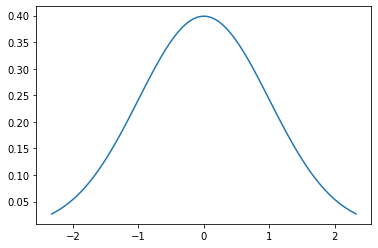

In [9]:
x=np.linspace(stats.norm.ppf(0.01), stats.norm.ppf(0.99), 100)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x, stats.norm.pdf(x));

In [11]:
2*stats.norm.cdf(-z)

0.026856695507523776

Задача о бриллиантах

In [12]:
import pandas as pd

In [16]:
df=pd.read_csv('diamonds.txt', sep='\t')

In [17]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [19]:
target=df['price']
print(target.head())

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


In [21]:
data=df.drop(['price'], axis=1)
data.head()

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75


In [22]:
from sklearn import model_selection

In [23]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.25, random_state=1)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [25]:
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
l_p=lr.predict(x_test)

In [27]:
rf=RandomForestRegressor(random_state=1)
rf.fit(x_train, y_train)

C:\Program Files\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [31]:
r_p=rf.predict(x_test)

In [37]:
d1=abs(l_p-np.array(y_test))
d2=abs(r_p-np.array(y_test))

In [38]:
print(np.mean(d1))
print(np.mean(d2))

890.3764004285596
802.9205172724115


In [40]:
pd.DataFrame(d1).describe()

,0
count,13485.000000
mean,890.376400
std,1161.068461
min,0.035915
25%,208.160385
50%,485.297677
75%,1098.149270
max,18239.846360


In [41]:
pd.DataFrame(d2).describe()

,0
count,13485.000000
mean,802.920517
std,1153.425557
min,0.000000
25%,120.925000
50%,320.600000
75%,977.000000
max,12443.600000


In [43]:
s=pd.DataFrame(d1-d2).std()

In [45]:
t=(np.mean(d1)-np.mean(d2))/s*np.sqrt(len(d1))

In [46]:
t

0    13.01773
dtype: float64

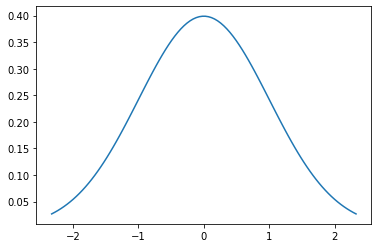

In [49]:
from scipy.stats import t
nu=len(d1)
x=np.linspace(stats.t.ppf(0.01, nu), stats.t.ppf(0.99, nu), 100)
plt.plot(x, stats.t.pdf(x, nu));

In [54]:
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic

In [57]:
print("sgd model mean auc 95%% confidence interval", _tconfint_generic(np.mean(d1-d2), s,
                                                                       len(d1) - 1,
                                                                       0.05, 'two-sided'))

sgd model mean auc 95%% confidence interval (0   -1441.751299
dtype: float64, 0    1616.663065
dtype: float64)
